In [1]:
import numpy as np 
from scipy.linalg import null_space

from typing import List, Union, Tuple

## General and Particular Solution for Linear System of Equations

In [2]:
def solve_linear_systems(A: Union[np.ndarray, List[List]] , b: Union[np.ndarray, List]) -> Tuple[np.ndarray, np.ndarray]:
        
        A = np.array(A)
        b = np.array(b)
        
        try:
            x_particular, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
        except np.linalg.LinAlgError as e:
              print(f"Error during least squares calculation: {e}")
              return None, None
        
        if not np.allclose(np.dot(A, x_particular), b):
            print("The system has no solution. It is inconsistent.")
            return None, None
        
        x_null_space = null_space(A)
        return x_particular, x_null_space

In [4]:
A = [[1, 0, 8, -4], 
     [0, 1, 2, 12]]
b = [42, 8]

x_particular, x_null_space = solve_linear_systems(A, b)

print(f"Particular Solution for Axp=b would be:{x_particular}")
print(f"Null vector of A:\n{x_null_space}")


Particular Solution for Axp=b would be:[ 0.58976913  0.1803531   5.07885921 -0.19483929]
Null vector of A:
[[-0.90181726  0.41621553]
 [-0.41486197 -0.90584541]
 [ 0.12001207 -0.01318466]
 [ 0.01456982  0.07768456]]


- Is the result the same as the one we find manually? **Why?**

## Linear Mappings

In [5]:
import matplotlib.pyplot as plt

In [6]:
house_coords = np.array([
    [0, 2, 2, 1, 0, 0],
    [0, 0, 1, 2, 1, 0]
])

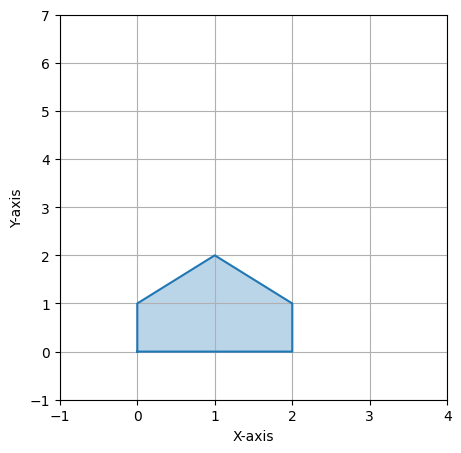

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.grid(True)
ax.plot(house_coords[0,:], house_coords[1,:], label="original shape")
ax.fill(house_coords[0, :], house_coords[1, :], alpha=0.3)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 7)
plt.show()

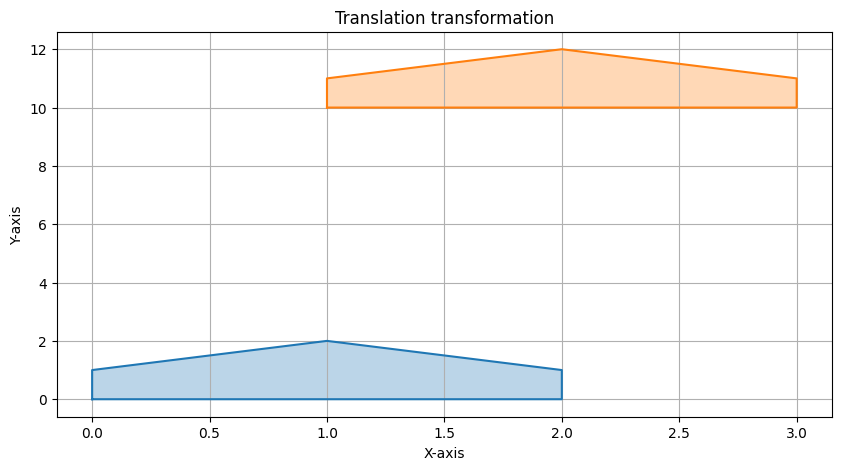

In [10]:
def translation(coords: np.ndarray, vector: np.ndarray) -> np.ndarray:
    return coords + vector.reshape(-1, 1)


tr_vector = np.array([1, 10])
tr_coords = translation(house_coords, tr_vector)

fig, ax = plt.subplots(figsize=(10, 5))
ax.grid(True)
ax.plot(house_coords[0,:], house_coords[1,:], label="original shape")
ax.fill(house_coords[0, :], house_coords[1, :], alpha=0.3)
ax.plot(tr_coords[0,:], tr_coords[1,:], label="original shape")
ax.fill(tr_coords[0, :], tr_coords[1, :], alpha=0.3)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
# ax.set_xlim(-1, 4)
# ax.set_ylim(-1, 7)
ax.set_title("Translation transformation")
plt.show()

In [12]:
def plot_shape(coords: np.ndarray, transformed_coords: np.ndarray) -> None:
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.grid(True)
    ax.plot(coords[0,:], coords[1,:], label="original shape")
    ax.fill(coords[0, :], coords[1, :], alpha=0.3)
    ax.plot(transformed_coords[0,:], transformed_coords[1,:], label="original shape")
    ax.fill(transformed_coords[0, :], transformed_coords[1, :], alpha=0.3)
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_title("Translation transformation")
    plt.show()

In [13]:
def apply_transformation(coords: np.ndarray, matrix: np.ndarray) -> np.ndarray:
    return matrix @ coords

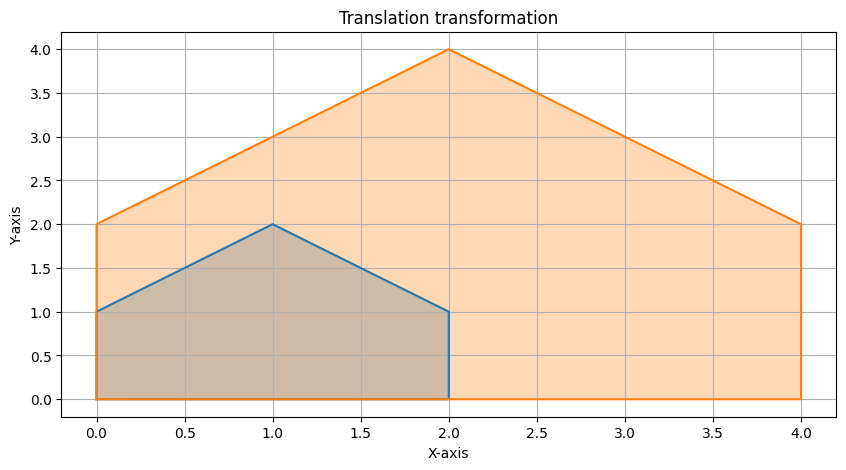

In [15]:
def scaling_matrix(sx: float, sy: float) -> np.ndarray:
    return np.array([
        [sx, 0],
        [0, sy]
    ])

scaled_coords = apply_transformation(house_coords, scaling_matrix(2, 2))
plot_shape(house_coords, scaled_coords)

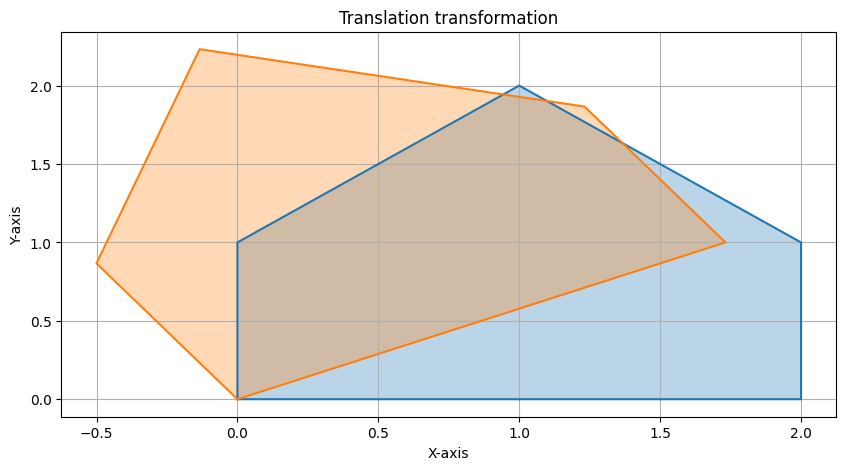

In [11]:
def rotation_matrix(angle: float) -> np.ndarray:
    cos_a, sin_a = np.cos(angle), np.sin(angle)
    return np.array([
        [cos_a, -sin_a],
        [sin_a,  cos_a]
    ])

rot_matrix = rotation_matrix(np.pi/6) 
rotated_coords = apply_transformation(house_coords, rot_matrix)
plot_shape(house_coords, rotated_coords)

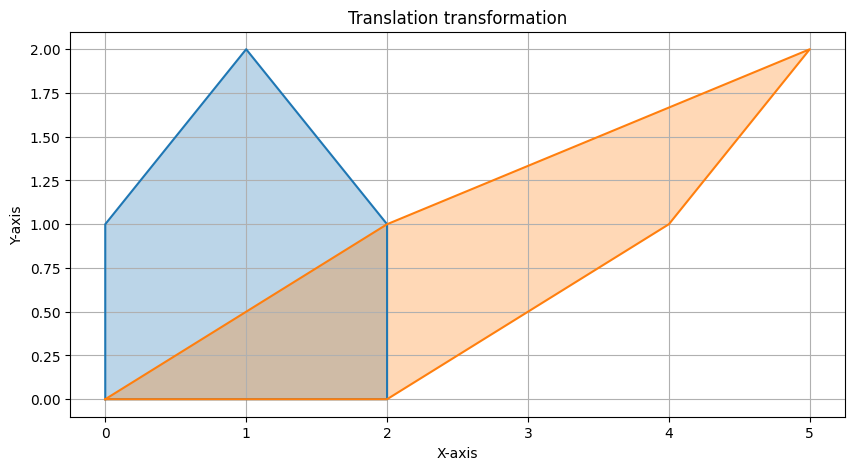

In [12]:
def shear_matrix(shx: float, shy: float) -> np.ndarray:
    return np.array([
        [1, shx],
        [shy, 1]
    ])

shear_x = shear_matrix(2, 0)
sheared_coords = apply_transformation(house_coords, shear_x)
plot_shape(house_coords, sheared_coords)

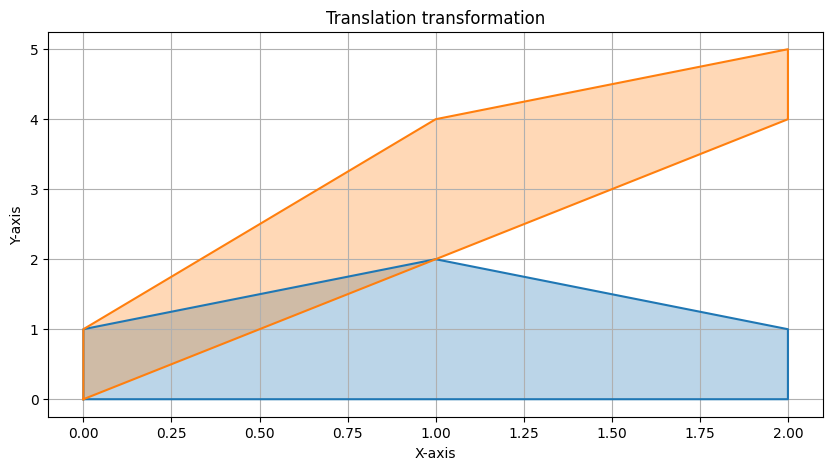

In [13]:
shear_y = shear_matrix(0, 2)
sheared_coords = apply_transformation(house_coords, shear_y)
plot_shape(house_coords, sheared_coords)

In [14]:
def affine_matrix(rot: np.ndarray, scale: np.ndarray, shear: np.ndarray, trans: np.ndarray) -> np.ndarray:
    linear_matrix = shear @ scale @ rot
    
    T = np.identity(3)
    T[:2, :2] = linear_matrix
    T[:2, 2] = trans
    
    return T

def apply_affine_transformation(coords: np.ndarray, matrix: np.ndarray) -> np.ndarray:
    homogeneous_coords = np.vstack([coords, np.ones(coords.shape[1])])
    
    transformed_homogeneous = matrix @ homogeneous_coords
    return transformed_homogeneous[:2, :]

## K-means Clustering

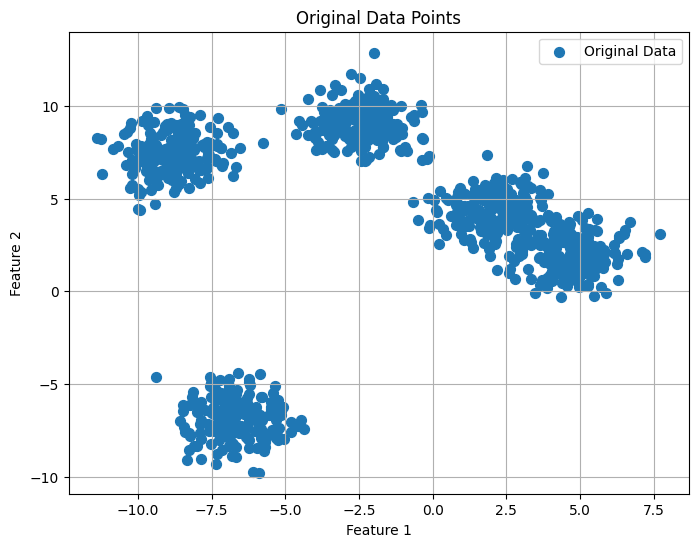

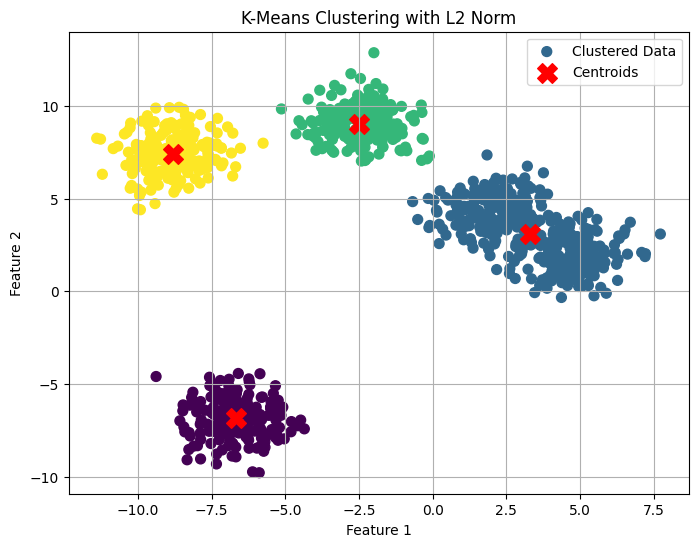

In [21]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt 

X, y = make_blobs(n_samples=1000, centers=5, n_features=2, random_state=42)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, label='Original Data')
ax.set_title('Original Data Points')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend()
ax.grid(True)
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X)

cluster_assignments = kmeans.predict(X)
centroids = kmeans.cluster_centers_

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], c=cluster_assignments, s=50, cmap='viridis', label='Clustered Data')
ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

ax.set_title('K-Means Clustering with L2 Norm')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend()
ax.grid(True)
plt.show()

## Linear Regression

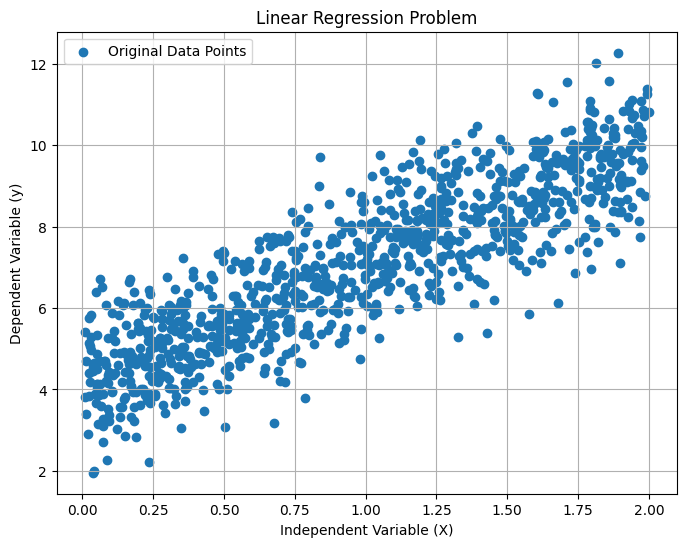

The best-fit line parameters are:
Slope (m): 2.9226
Intercept (c): 4.1748


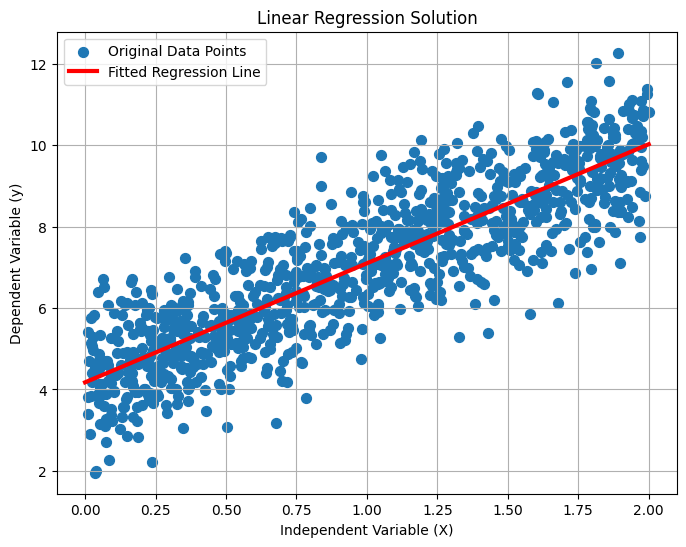

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


np.random.seed(42)
N = 1000
X = 2 * np.random.rand(1000, 1) 
y = 4 + 3 * X + np.random.randn(1000, 1) 

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X, y, label='Original Data Points')
ax.set_title('Linear Regression Problem')
ax.set_xlabel('Independent Variable (X)')
ax.set_ylabel('Dependent Variable (y)')
ax.legend()
ax.grid(True)
plt.show()

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"The best-fit line parameters are:")
print(f"Slope (m): {slope:.4f}")
print(f"Intercept (c): {intercept:.4f}")

X_pred = np.array([[0], [2]])
y_pred = model.predict(X_pred)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X, y, s=50, label='Original Data Points')
ax.plot(X_pred, y_pred, 'r-', linewidth=3, label='Fitted Regression Line')
ax.set_title('Linear Regression Solution')
ax.set_xlabel('Independent Variable (X)')
ax.set_ylabel('Dependent Variable (y)')
ax.legend()
ax.grid(True)
plt.show()

- Does it correct to validate the fitted line on the same points we find the coefficients?

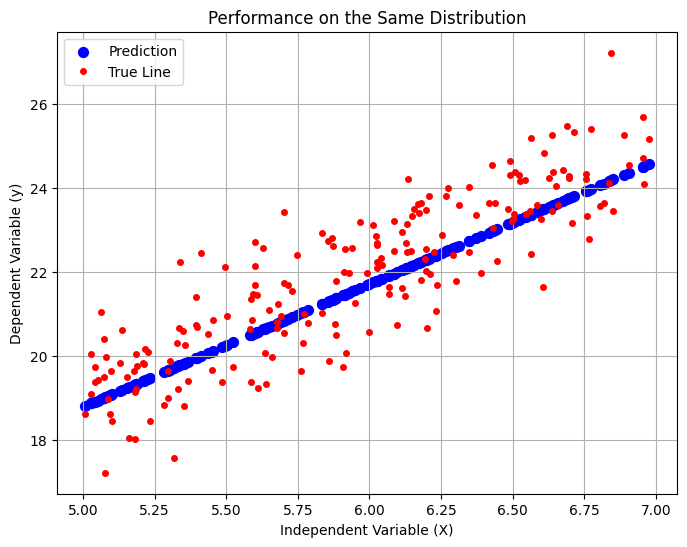

In [46]:
np.random.seed(10)
X_test = 2 * np.random.rand(N // 5, 1) + 5
y_test =  4 + 3 * X_test + np.random.randn(N//5, 1) 

y_pred = model.predict(X_test)
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_test, y_pred, s=50, color='b', label='Prediction')
ax.plot(X_test, y_test, 'r.', markersize=8, label='True Line')
ax.set_title('Performance on the Same Distribution')
ax.set_xlabel('Independent Variable (X)')
ax.set_ylabel('Dependent Variable (y)')
ax.legend()
ax.grid(True)
plt.show()

### Orthogonalization (Gram-Schmidt Algorithm)

In [2]:
import numpy as np

def gram_schmidt(A: np.ndarray) -> np.ndarray:
    A_copy = np.copy(A).astype(np.float64)
    n = A_copy.shape[1]
    
    for j in range(n):
        for k in range(j):
            A_copy[:, j] -= np.dot(A_copy[:, k], A_copy[:, j]) * A_copy[:, k]
        
        norm = np.linalg.norm(A_copy[:, j])
        if norm > 1e-10: 
            A_copy[:, j] /= norm
            
    return A_copy

A = np.array([[1.0, 1.0, 0.0], [1.0, 3.0, 1.0], [2.0, -1.0, 1.0]])
orthonormal_matrix = gram_schmidt(A)
print("Original matrix:")
print(A)
print("\nOrthonormalized matrix (columns):")
print(orthonormal_matrix)

print("\nVerification (Q^T * Q):")
print(np.round(np.dot(orthonormal_matrix.T, orthonormal_matrix)))

Original matrix:
[[ 1.  1.  0.]
 [ 1.  3.  1.]
 [ 2. -1.  1.]]

Orthonormalized matrix (columns):
[[ 0.40824829  0.20739034 -0.88900089]
 [ 0.40824829  0.82956136  0.38100038]
 [ 0.81649658 -0.51847585  0.25400025]]

Verification (Q^T * Q):
[[ 1. -0. -0.]
 [-0.  1.  0.]
 [-0.  0.  1.]]


### Intuition to Eigenvalue Decomposition

In [ ]:
def plot_transformation(A: np.ndarray, title: str) -> None:

    x = np.arange(-5, 6, 1)
    y = np.arange(-5, 6, 1)
    xx, yy = np.meshgrid(x, y)
    
    vectors = np.vstack([xx.ravel(), yy.ravel()])
    
    transformed_vectors = A @ vectors
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(vectors[0], vectors[1], color='blue', alpha=0.5, label='Original Vectors')
    ax.scatter(transformed_vectors[0], transformed_vectors[1], color='red', alpha=0.7, label='Transformed Vectors')
    colors = ['blue', 'black']


    w, v = np.linalg.eig(A)
    for i in range(v.shape[1]):
        eigenvector = v[:, i]
        eigenvalue = w[i]
        
        ax.quiver(0, 0, eigenvector[0], eigenvector[1], 
                angles='xy', scale_units='xy', scale=1, 
                color=colors[i], width=0.009, zorder=5, 
                label=f'Eigenvector {i+1} (λ={eigenvalue:.2f})')

    ax.set_title(title)
    ax.set_xlim(-8, 8)
    ax.set_ylim(-8, 8)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')
    ax.legend()
    plt.show()

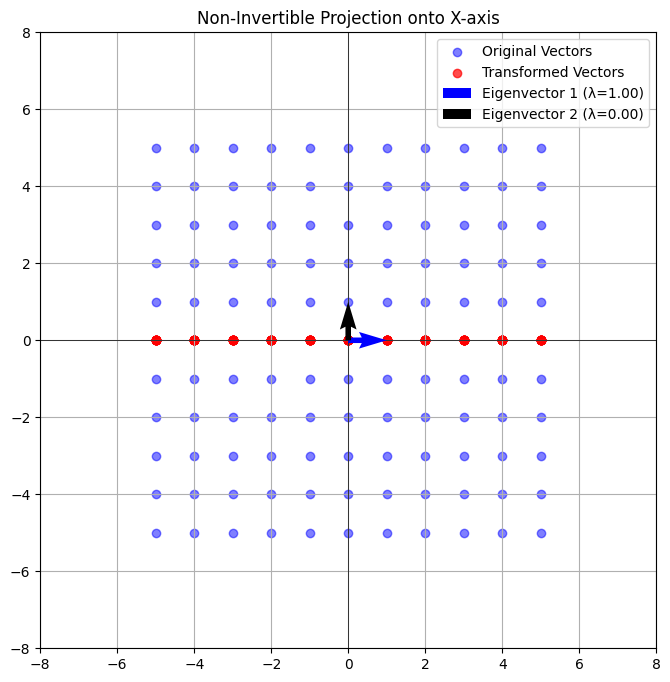

In [75]:
A_non_invertible = np.array([[1, 0],
                             [0, 0]])
plot_transformation(A_non_invertible, "Non-Invertible Projection onto X-axis")

### Latent Semantic Analysis (LSA)

In [ ]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

categories = [
    'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey',
    'talk.politics.misc', 'talk.politics.guns', 'talk.politics.mideast',
]
dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)
documents = dataset.data

#### How to convert the documents into a numerical vector? 

**TF-IFD**:
- TF-IDF is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents (a corpus). It is often used as a weighting factor in information retrieval and text mining.

    - **Term Frequency (TF)**: This is a count of how often a word appears in a specific document. A higher TF means the word is more frequent in that document.
    - **Inverse Document Frequency (IDF)**: This is a measure of how rare a word is across all documents in the corpus. Words that are very common (like "the" or "a") will have a low IDF score, while rare words will have a high IDF score. 
    
- The final TF-IDF score is the product of TF and IDF. A high score is given to words that appear frequently in a document but rarely across the entire corpus, thus highlighting words that are unique and important to that specific document

In [7]:
print(len(documents))

6604


In [8]:
vectorizer = TfidfVectorizer(
    max_df=0.5, min_df=5, stop_words="english"
)
X = vectorizer.fit_transform(documents)
print(X.shape)

(6604, 18681)


In [13]:
svd = TruncatedSVD(n_components=5, random_state=42)
lsa_X = svd.fit_transform(X)
print(lsa_X.shape)

(6604, 5)


In [14]:
k_means = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=1)
k_means.fit(lsa_X)

,n_clusters,5
,init,'k-means++'
,n_init,1
,max_iter,100
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [25]:
labels = k_means.labels_

original_space_centroids = svd.inverse_transform(k_means.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(5):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :10]:
        print(f"  {terms[ind]}")
    print("\n")

Cluster 0:
  armenian
  armenians
  turkish
  armenia
  serdar
  argic
  turks
  genocide
  soviet
  people


Cluster 1:
  com
  people
  stratus
  don
  like
  just
  car
  gun
  posting
  think


Cluster 2:
  cramer
  optilink
  clayton
  gay
  men
  homosexual
  com
  virginia
  study
  homosexuals


Cluster 3:
  game
  team
  ca
  hockey
  games
  year
  university
  don
  players
  baseball


Cluster 4:
  israel
  israeli
  jews
  arab
  jewish
  jake
  people
  arabs
  adam
  peace




### Principle Component Analysis

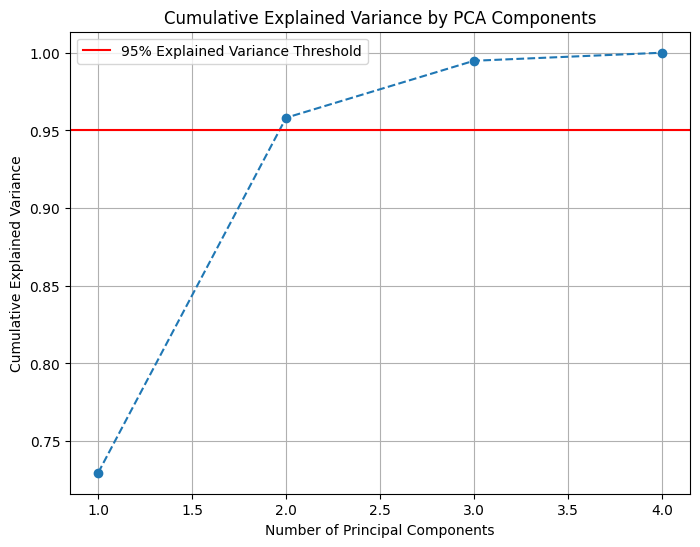

In [38]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X, y = load_iris(return_X_y=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance Threshold')
plt.legend()
plt.grid(True)
plt.show()
